In [1]:
import warnings
warnings.filterwarnings('ignore')
#Можно нейроннку, а можно бустинг

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Задача прогнозирования временных рядов

Intro:

Имеется набор данных, в котором находятся два временных ряда для двух разных игровых проектов. Для каждого проекта временной ряд состоит из 24 измерений количества чарджбэков (транзакции, за которые были возвращены денежные средства, такие транзакции считаются отмененными) за месяц (т.е временные ряды в месячной динамике за 2 года по каждому из проектов).

To-do:
Необходимо разработать модель прогнозирования данных временных рядов на 1 месяц вперед, основанную на алгоритме искусственной нейронной сети (или градиентного бустинга, в данном ноутбуке будет предложен base line для искусственной нейронной сети, но никто не мешает воспользоваться материалами прошлых занятий и сделать модель на алгоритме градиентного бустинга).

Это может быть одна модель для обоих временных рядов или для каждого временного ряда собственная модель. В данном случае разработка собственной модели прогнозирования для каждого отдельного временного ряда - допустимый подход, потому что постепенное дообучение моделей для 2 временных рядов не займет слишком много времени с точки зрения бизнеса и количества игровых проектов, для которых нужны прогнозы. К тому же временные ряды количества чарджбэков могут быть слишком разными для разных игровых проектов из-за различий в аудитории самой игры, поэтому не всегда удается сделать универсальную модель (чтобы сделать универсальную модель - нужно сначала решить задачу кластеризации похожих между собой игровых проектов)

In [70]:
#загружаем данные
GeneralDataFrame = pd.read_csv('ts_pred_ds.csv')
GeneralDataFrame.shape

(48, 3)

In [4]:
#посмотрим первые 5 строк генерального набора данных
GeneralDataFrame.head()

,Date,NumOfChargebacks,Project
0,01/2017,226,1
1,02/2017,273,1
2,03/2017,226,1
3,04/2017,245,1
4,05/2017,213,1


In [5]:
#посмотрим последние 5 строк генерального набора данных
GeneralDataFrame.tail()

,Date,NumOfChargebacks,Project
43,08/2018,5,2
44,09/2018,3,2
45,10/2018,13,2
46,11/2018,8,2
47,12/2018,8,2


In [6]:
#общие характеристики генерального набора данных
GeneralDataFrame.describe()

,NumOfChargebacks,Project
count,48.000000,48.000000
mean,71.166667,1.500000
std,79.911210,0.505291
min,1.000000,1.000000
25%,5.750000,1.000000
50%,39.500000,1.500000
75%,111.000000,2.000000
max,273.000000,2.000000


Задание 1.

Разделим генеральный набор данных на 2 подвыбоки по проектам

In [7]:
Project1_ts = GeneralDataFrame[GeneralDataFrame['Project'] == 1]
Project2_ts = GeneralDataFrame[GeneralDataFrame['Project'] == 2]

#восстановим индексирование с 0 для каждой подвыборки
Project1_ts = Project1_ts.reset_index(drop=True)
Project2_ts = Project2_ts.reset_index(drop=True)

In [8]:
Project1_ts

,Date,NumOfChargebacks,Project
0,01/2017,226,1
1,02/2017,273,1
2,03/2017,226,1
3,04/2017,245,1
4,05/2017,213,1
5,06/2017,249,1
6,07/2017,125,1
7,08/2017,149,1
8,09/2017,111,1
9,10/2017,111,1


In [9]:
Project2_ts

,Date,NumOfChargebacks,Project
0,01/2017,2,2
1,02/2017,2,2
2,03/2017,2,2
3,04/2017,10,2
4,05/2017,4,2
5,06/2017,4,2
6,07/2017,9,2
7,08/2017,1,2
8,09/2017,25,2
9,10/2017,6,2


Задание 2.

- Построить график имеющегося у нас временного ряда по первому игровому проекту
- Построить график имеющегося у нас временного ряда по второму игровому проекту


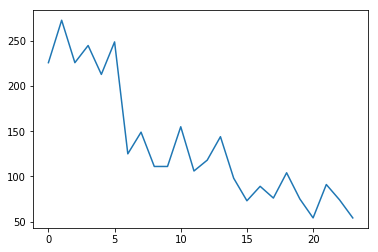

In [10]:
#график временного ряда количества чарджбэков по месяцам для первого игровой проект
plt.plot(Project1_ts['NumOfChargebacks'])
plt.show()

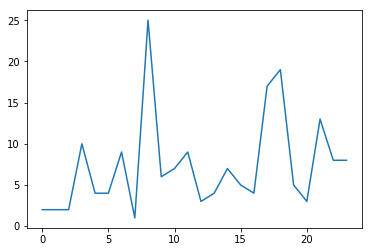

In [11]:
#график временного ряда количества чарджбэков по месяцам для второго игровой проект
plt.plot(Project2_ts['NumOfChargebacks'])
plt.show()

In [12]:
GeneralDataFrame.head()

,Date,NumOfChargebacks,Project
0,01/2017,226,1
1,02/2017,273,1
2,03/2017,226,1
3,04/2017,245,1
4,05/2017,213,1


Задание 3. 

- Понять какое количество значений временного ряда будет достаточно для прогнозирования на 1 месяц вперед (гипер-параметр) для каждого игрового проекта
- Подготовить набор данных с нужным количеством предикторов и одним ответом для обучения и тестирования моделей прогнозирования временных рядов по каждому игровому проекту
- Предобработать данные для подачи на вход нейронной сети (если нужно)

In [13]:
#функция для добавления к значениям ряда NumOfChargebacks нужного количества предыдущих заначений 
#количество предыдущих значений должно быть достаточным для прогнозирования временного ряда на 1 месяц вперед
def AddPrevDays(df = None,want_days_back = None,interest_column = None):

    prev_columns = []
  
    for d in range(want_days_back):
        df[interest_column + '_prev_' + str(d+1)] = df.groupby(['Project'])[interest_column].shift(d+1)
        
        prev_columns.append(interest_column + '_prev_' + str(d+1))
        
        print(d)
        
    df.dropna( inplace = True)
    return df,prev_columns 

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


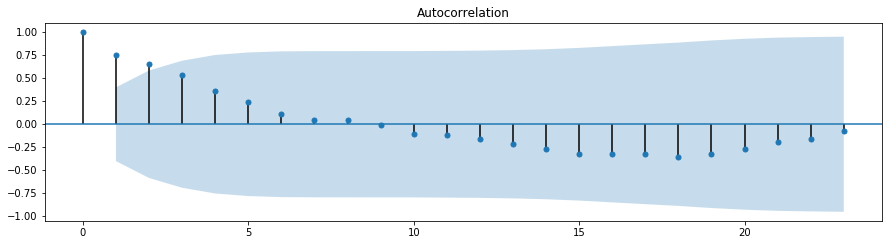

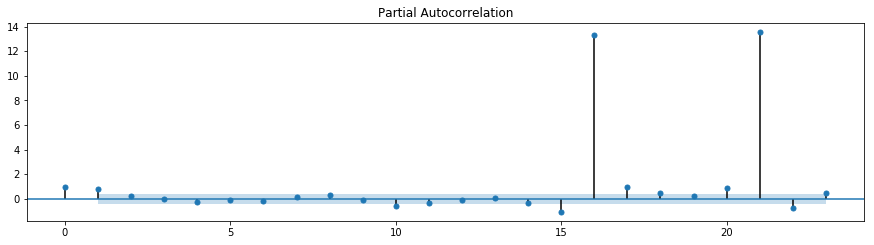

In [15]:
#Попробуем построить корреляционные диаграммы для 1 проекта, чтобы примерно почувствовать, сколько нужно брать дат для предсказания
#Примерно 6-7
import statsmodels.api as sm
%pylab
%pylab inline
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(Project1_ts['NumOfChargebacks'].values.squeeze(), lags=23, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(Project1_ts['NumOfChargebacks'].values.squeeze(), lags=23, ax=ax)
pylab.show()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


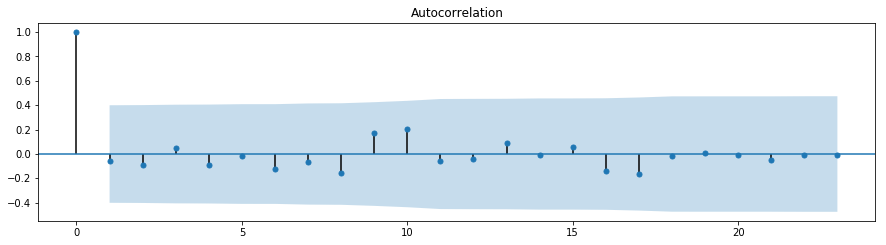

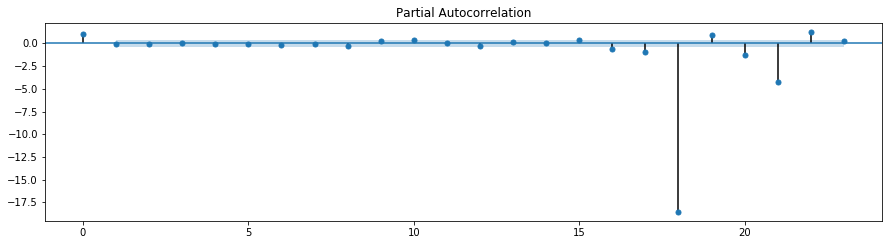

In [33]:
#Попробуем построить корреляционные диаграммы для 2 проекта, чтобы примерно почувствовать, сколько нужно брать дат для предсказания
#Примерно 9-11
%pylab
%pylab inline
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(Project2_ts['NumOfChargebacks'].values.squeeze(), lags=23, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(Project2_ts['NumOfChargebacks'].values.squeeze(), lags=23, ax=ax)
pylab.show()

In [16]:
Project1_ts_res,prev_columns_1 = AddPrevDays(df = Project1_ts,
                                           want_days_back = 7, #''количество необходимых предыдущих значений''',
                                           interest_column = 'NumOfChargebacks')

0
1
2
3
4
5
6


In [17]:
Project2_ts_res,prev_columns_2 = AddPrevDays(df = Project2_ts,
                                           want_days_back = 9,#'''количество необходимых предыдущих значений''',
                                           interest_column = 'NumOfChargebacks')

0
1
2
3
4
5
6
7
8


In [18]:
Project1_ts_res

,Date,NumOfChargebacks,Project,NumOfChargebacks_prev_1,NumOfChargebacks_prev_2,NumOfChargebacks_prev_3,NumOfChargebacks_prev_4,NumOfChargebacks_prev_5,NumOfChargebacks_prev_6,NumOfChargebacks_prev_7
7,08/2017,149,1,125.0,249.0,213.0,245.0,226.0,273.0,226.0
8,09/2017,111,1,149.0,125.0,249.0,213.0,245.0,226.0,273.0
9,10/2017,111,1,111.0,149.0,125.0,249.0,213.0,245.0,226.0
10,11/2017,155,1,111.0,111.0,149.0,125.0,249.0,213.0,245.0
11,12/2017,106,1,155.0,111.0,111.0,149.0,125.0,249.0,213.0
12,01/2018,118,1,106.0,155.0,111.0,111.0,149.0,125.0,249.0
13,02/2018,144,1,118.0,106.0,155.0,111.0,111.0,149.0,125.0
14,03/2018,98,1,144.0,118.0,106.0,155.0,111.0,111.0,149.0
15,04/2018,73,1,98.0,144.0,118.0,106.0,155.0,111.0,111.0
16,05/2018,89,1,73.0,98.0,144.0,118.0,106.0,155.0,111.0


In [19]:
Project2_ts_res

,Date,NumOfChargebacks,Project,NumOfChargebacks_prev_1,NumOfChargebacks_prev_2,NumOfChargebacks_prev_3,NumOfChargebacks_prev_4,NumOfChargebacks_prev_5,NumOfChargebacks_prev_6,NumOfChargebacks_prev_7,NumOfChargebacks_prev_8,NumOfChargebacks_prev_9
9,10/2017,6,2,25.0,1.0,9.0,4.0,4.0,10.0,2.0,2.0,2.0
10,11/2017,7,2,6.0,25.0,1.0,9.0,4.0,4.0,10.0,2.0,2.0
11,12/2017,9,2,7.0,6.0,25.0,1.0,9.0,4.0,4.0,10.0,2.0
12,01/2018,3,2,9.0,7.0,6.0,25.0,1.0,9.0,4.0,4.0,10.0
13,02/2018,4,2,3.0,9.0,7.0,6.0,25.0,1.0,9.0,4.0,4.0
14,03/2018,7,2,4.0,3.0,9.0,7.0,6.0,25.0,1.0,9.0,4.0
15,04/2018,5,2,7.0,4.0,3.0,9.0,7.0,6.0,25.0,1.0,9.0
16,05/2018,4,2,5.0,7.0,4.0,3.0,9.0,7.0,6.0,25.0,1.0
17,06/2018,17,2,4.0,5.0,7.0,4.0,3.0,9.0,7.0,6.0,25.0
18,07/2018,19,2,17.0,4.0,5.0,7.0,4.0,3.0,9.0,7.0,6.0


In [20]:
#сформируем набор данных для обучения и тестирования модели по первому игровому проекту
#в этом наборе данных должны быть только полученные не предыдущем шане предикторы и отклик
#
Project1_ts_res_back = Project1_ts_res[prev_columns_1]

In [21]:
#сформируем набор данных для обучения и тестирования модели по второму игровому проекту
#в этом наборе данных должны быть только полученные не предыдущем шане предикторы и отклик
#
Project2_ts_res_back = Project2_ts_res[prev_columns_2]

In [22]:
Project1_ts_res_back = np.log(Project1_ts_res_back) 

In [23]:
Project2_ts_res_back = np.log(Project2_ts_res_back) 

In [24]:
Project1_ts_res_back = Project1_ts_res_back.reset_index(drop=True)
Project2_ts_res_back = Project2_ts_res_back.reset_index(drop=True)

Задание 4. 

- Провести валидацию модели с помощью кросс-валидации для временных рядов (последовательная валидация) для подбора гипер-параметров
- Обучить модель с итоговой архитектурой на полном наборе данных и получить прогноз на 1 месяц вперед

In [58]:
#можно использовать другой пакет для создания нейросетевых моделей на вкус и цвет
MLP_Project1 = MLPRegressor(hidden_layer_sizes = (20,11),max_iter = 1000,random_state = 42)

In [44]:
MLP_Project2 = MLPRegressor(hidden_layer_sizes = (5,5),max_iter = 1000,random_state = 42)

In [27]:
Project2_ts_res_back

,NumOfChargebacks_prev_1,NumOfChargebacks_prev_2,NumOfChargebacks_prev_3,NumOfChargebacks_prev_4,NumOfChargebacks_prev_5,NumOfChargebacks_prev_6,NumOfChargebacks_prev_7,NumOfChargebacks_prev_8,NumOfChargebacks_prev_9
0,3.218876,0.000000,2.197225,1.386294,1.386294,2.302585,0.693147,0.693147,0.693147
1,1.791759,3.218876,0.000000,2.197225,1.386294,1.386294,2.302585,0.693147,0.693147
2,1.945910,1.791759,3.218876,0.000000,2.197225,1.386294,1.386294,2.302585,0.693147
3,2.197225,1.945910,1.791759,3.218876,0.000000,2.197225,1.386294,1.386294,2.302585
4,1.098612,2.197225,1.945910,1.791759,3.218876,0.000000,2.197225,1.386294,1.386294
5,1.386294,1.098612,2.197225,1.945910,1.791759,3.218876,0.000000,2.197225,1.386294
6,1.945910,1.386294,1.098612,2.197225,1.945910,1.791759,3.218876,0.000000,2.197225
7,1.609438,1.945910,1.386294,1.098612,2.197225,1.945910,1.791759,3.218876,0.000000
8,1.386294,1.609438,1.945910,1.386294,1.098612,2.197225,1.945910,1.791759,3.218876
9,2.833213,1.386294,1.609438,1.945910,1.386294,1.098612,2.197225,1.945910,1.791759


In [28]:
Project1_ts_res_back.shape[1]

7

In [29]:
#запрограммируйте функцию кросс валидации для временного ряда по 5 фолдам
#обучение идет с первого элемента до 5 с конца далее идет предсказание на 4 с конца элементе
#далее обучение идет до 4 с конца и предсказание на 3 с конца
#и т.д. до последнего 0 элемента с конца
def ValidateModel(Data,Model):
    
    errors = []
    predictions = []

    #проведем 5 тестов последовательной валидации
    for i in range(0,5):
    
        #на каждой итерации подготавливаем новый тренировочный набор данных и новый тестовый кортеж
        train_x = Data.iloc[0:(Data.shape[0]-5+i),0:Data.shape[1]-1]
        train_y = Data.iloc[0:(Data.shape[0]-5+i),Data.shape[1]-1]
        test_x = [Data.iloc[(Data.shape[0]-5+i),0:Data.shape[1]-1]]
        test_y = [Data.iloc[(Data.shape[0]-5+i),Data.shape[1]-1]]
        
                 #   train_x = ResultDF_log.iloc[0:(127+i),0:12]
          #  train_y = ResultDF_log.iloc[0:(127+i),12]
          #  test_x = [ResultDF_log.iloc[(127+i),0:12]]
           # test_y = [ResultDF_log.iloc[(127+i),12]]
    
        #последовательно обучаем нейронную сеть и последовательно тестируем на кортежах
        Model.fit(train_x,train_y)
        pred = int(np.exp(Model.predict(test_x)))
        predictions.append(pred)
        error = (np.absolute(np.exp(test_y)-pred)/np.exp(test_y))*100
        errors.append(error)

    print(predictions)
        
    #расчитаем ошибку MAPE для всего процесса последовательной валидации
    MAPE = np.mean(errors)
    Accuracy = 100 - MAPE
    print('MAPE: ' + str(MAPE))
    print('Accuracy: ' + str(Accuracy))
    return Accuracy

In [59]:
#результаты валидации модели для первого игрового проекта
ValidateModel(Project1_ts_res_back, MLP_Project1)

[122, 105, 99, 102, 99]
MAPE: 16.491110891702643
Accuracy: 83.50888910829735


In [45]:
#результаты валидации модели для второго игрового проекта
ValidateModel(Project2_ts_res_back, MLP_Project2)

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[4, 9, 3, 3, 4]
MAPE: 22.142857142857146
Accuracy: 77.85714285714286


In [61]:
#Поиграемся с нейронами
for ind in range(18,23):
    for jnd in range(8,13):
        MLP_Project2 = MLPRegressor(hidden_layer_sizes = (ind,jnd),max_iter = 1000,random_state = 42)
        ValidateModel(Project2_ts_res_back, MLP_Project2)
        print('!' +str(s) + ' ' + str(ind) + ' ' + str(jnd))

[1, 7, 14, 0, 11]
MAPE: 126.34920634920634
Accuracy: -26.34920634920634
!None 18 8


C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[8, 16, 15, 4, 7]
MAPE: 98.4126984126984
Accuracy: 1.5873015873015959
!None 18 9
[1, 17, 22, 2, 9]
MAPE: 177.3015873015873
Accuracy: -77.30158730158729
!None 18 10
[6, 30, 17, 3, 8]
MAPE: 150.71428571428572
Accuracy: -50.71428571428572
!None 18 11
[2, 11, 12, 6, 17]
MAPE: 117.30158730158728
Accuracy: -17.301587301587276
!None 18 12
[1, 10, 32, 3, 5]
MAPE: 223.4126984126984
Accuracy: -123.4126984126984
!None 19 8
[0, 9, 27, 2, 7]
MAPE: 189.99999999999997
Accuracy: -89.99999999999997
!None 19 9
[1, 5, 35, 3, 4]
MAPE: 252.9365079365079
Accuracy: -152.9365079365079
!None 19 10
[0, 6, 22, 1, 4]
MAPE: 176.9047619047619
Accuracy: -76.9047619047619
!None 19 11
[2, 7, 31, 1, 2]
MAPE: 234.68253968253967
Accuracy: -134.68253968253967
!None 19 12
[1, 30, 14, 5, 9]
MAPE: 147.85714285714283
Accuracy: -47.85714285714283
!None 20 8
[4, 13, 21, 5, 11]
MAPE: 153.88888888888886
Accuracy: -53.88888888888886
!None 20 9
[2, 24, 23, 4, 13]
MAPE: 198.09523809523807
Accuracy: -98.09523809523807
!None 20 10
[1,

In [71]:
#обучите итоговую модель с архитектуруой, которую Вы подобрали на полном наборе данных и спрогнозируйте новое значение ряда
#
Project_ts_res,prev_columns = AddPrevDays(df = GeneralDataFrame,
                                           want_days_back = 10, #''количество необходимых предыдущих значений''',
                                           interest_column = 'NumOfChargebacks')#GeneralDataFrame

0
1
2
3
4
5
6
7
8
9


In [72]:
Project_ts_res

,Date,NumOfChargebacks,Project,NumOfChargebacks_prev_1,NumOfChargebacks_prev_2,NumOfChargebacks_prev_3,NumOfChargebacks_prev_4,NumOfChargebacks_prev_5,NumOfChargebacks_prev_6,NumOfChargebacks_prev_7,NumOfChargebacks_prev_8,NumOfChargebacks_prev_9,NumOfChargebacks_prev_10
10,11/2017,155,1,111.0,111.0,149.0,125.0,249.0,213.0,245.0,226.0,273.0,226.0
11,12/2017,106,1,155.0,111.0,111.0,149.0,125.0,249.0,213.0,245.0,226.0,273.0
12,01/2018,118,1,106.0,155.0,111.0,111.0,149.0,125.0,249.0,213.0,245.0,226.0
13,02/2018,144,1,118.0,106.0,155.0,111.0,111.0,149.0,125.0,249.0,213.0,245.0
14,03/2018,98,1,144.0,118.0,106.0,155.0,111.0,111.0,149.0,125.0,249.0,213.0
15,04/2018,73,1,98.0,144.0,118.0,106.0,155.0,111.0,111.0,149.0,125.0,249.0
16,05/2018,89,1,73.0,98.0,144.0,118.0,106.0,155.0,111.0,111.0,149.0,125.0
17,06/2018,76,1,89.0,73.0,98.0,144.0,118.0,106.0,155.0,111.0,111.0,149.0
18,07/2018,104,1,76.0,89.0,73.0,98.0,144.0,118.0,106.0,155.0,111.0,111.0
19,08/2018,75,1,104.0,76.0,89.0,73.0,98.0,144.0,118.0,106.0,155.0,111.0


In [73]:
Project_ts_res = Project_ts_res[prev_columns]
Project_ts_res = np.log(Project_ts_res)
Project_ts_res = Project_ts_res.reset_index(drop=True)

In [83]:
MLP_Project = MLPRegressor(hidden_layer_sizes = (5,20),max_iter = 1000,random_state = 42)
ValidateModel(Project_ts_res, MLP_Project)

[7, 5, 3, 5, 7]
MAPE: 50.71428571428571
Accuracy: 49.28571428571429
